## 911 -Emergency call dataset -
The data- contains the following fields:-- -  

- lat : String variable, Latitude
- lng: String variable, Longitude
- desc: String variable, Description of the Emergency Call
- zip: String variable, Zipcode
- title: String variable, Title
- timeStamp: String variable, YYYY-MM-DD HH:MM:SS
- twp: String variable, Township
- addr: String variable, Address
- e: String variable, Dummy variable (always 1)

## Exploratory Data Analysis (EDA)- Python

In [1]:
# Importing required libraries

import numpy as np
import pandas as pd 
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
emer = pd.read_csv("../input/montcoalert/911.csv")

#### Extracting some insights from the dataset

In [3]:
emer.shape

(423909, 9)

In [4]:
emer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423909 entries, 0 to 423908
Data columns (total 9 columns):
lat          423909 non-null float64
lng          423909 non-null float64
desc         423909 non-null object
zip          371780 non-null float64
title        423909 non-null object
timeStamp    423909 non-null object
twp          423750 non-null object
addr         423909 non-null object
e            423909 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 29.1+ MB


In [5]:
emer.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [6]:
emer.isnull().sum()

lat              0
lng              0
desc             0
zip          52129
title            0
timeStamp        0
twp            159
addr             0
e                0
dtype: int64

#### We see the data has been imported properly and there are not any NAN values in the coulmns like: timeStamp, title, desc, which will of more use to us later.

### Data Cleaning:
#### However we see the last column 'e' has no significance as its a dummy column and all the entries are equal to 1, so its better to discard that column.

In [7]:
emer.drop("e", axis=1, inplace=ace=ace=ace = True)
emer.head(3)

SyntaxError: invalid syntax (<ipython-input-7-2e0805a7c429>, line 1)

### Converting "timeStamp" object into a proper DateTime Object:
#### If you check the type of the timeStamp col, its a series and the values are of string data type, but we need the column is data time format to do analysis.

In [8]:
emer["timeStamp"] = pd.to_datetime(emer["timeStamp"])
type(emer["timeStamp"][0])

pandas._libs.tslibs.timestamps.Timestamp

### Spliting the timeStamp col in different cols, Date, Month, Year, Day of week, Hour.

In [9]:
emer["Day of week"] = emer["timeStamp"].apply(lambda time: time.dayofweek)
emer["Date"] = emer["timeStamp"].apply(lambda time: time.day)
emer["Month"] = emer["timeStamp"].apply(lambda time: time.month)
emer["Year"] = emer["timeStamp"].apply(lambda time: time.year)
emer["Hour"] = emer["timeStamp"].apply(lambda time: time.hour)
emer.head(4)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Day of week,Date,Month,Year,Hour
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,3,10,12,2015,17
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,3,10,12,2015,17
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,3,10,12,2015,14
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,3,10,12,2015,16


### If we notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week:

In [10]:
dtmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
emer["Day of week"] = emer["Day of week"].map(dtmap)
emer.head(4)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Day of week,Date,Month,Year,Hour
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,Thu,10,12,2015,17
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,Thu,10,12,2015,17
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Thu,10,12,2015,14
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,Thu,10,12,2015,16


### Also we can segregate on the day & night time basis

In [11]:
emer["Day/Night"] = emer["timeStamp"].apply(lambda x : "Night" if int(x.strftime("%H")) > 18 else "Day")
emer.head(4)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Day of week,Date,Month,Year,Hour,Day/Night
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,Thu,10,12,2015,17,Day
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,Thu,10,12,2015,17,Day
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Thu,10,12,2015,14,Day
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,Thu,10,12,2015,16,Day


## Lets find out the detailed reasons of incidents using title col:

In [12]:
emer["Reason"] = emer["title"].apply(lambda i:i.split(":") [0])
emer["Detailed Reason"] = emer["title"].apply(lambda i:i.split(":") [1])
emer.head(4)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Day of week,Date,Month,Year,Hour,Day/Night,Reason,Detailed Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,Thu,10,12,2015,17,Day,EMS,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,Thu,10,12,2015,17,Day,EMS,DIABETIC EMERGENCY
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Thu,10,12,2015,14,Day,Fire,GAS-ODOR/LEAK
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,Thu,10,12,2015,16,Day,EMS,CARDIAC EMERGENCY


## Extract which station recorded more number of calls.

In [13]:
emer["Station"] = emer["desc"].str.extract("(Station.+?);", expand=False).str.strip()
emer.head(4)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Day of week,Date,Month,Year,Hour,Day/Night,Reason,Detailed Reason,Station
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,Thu,10,12,2015,17,Day,EMS,BACK PAINS/INJURY,Station 332
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,Thu,10,12,2015,17,Day,EMS,DIABETIC EMERGENCY,Station 345
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Thu,10,12,2015,14,Day,Fire,GAS-ODOR/LEAK,Station:STA27
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,Thu,10,12,2015,16,Day,EMS,CARDIAC EMERGENCY,Station 308A


#### Now we can remove the title and timeStamp col, as we extracted the information from it 

In [14]:
del emer["title"]
del emer["timeStamp"]
emer.head(4)

,lat,lng,desc,zip,twp,addr,e,Day of week,Date,Month,Year,Hour,Day/Night,Reason,Detailed Reason,Station
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,NEW HANOVER,REINDEER CT & DEAD END,1,Thu,10,12,2015,17,Day,EMS,BACK PAINS/INJURY,Station 332
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,Thu,10,12,2015,17,Day,EMS,DIABETIC EMERGENCY,Station 345
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,NORRISTOWN,HAWS AVE,1,Thu,10,12,2015,14,Day,Fire,GAS-ODOR/LEAK,Station:STA27
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,NORRISTOWN,AIRY ST & SWEDE ST,1,Thu,10,12,2015,16,Day,EMS,CARDIAC EMERGENCY,Station 308A


## DATA VISUALIZATION

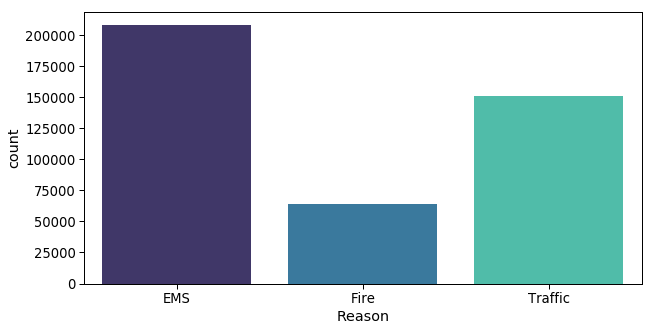

In [15]:
# Find out the major reason type of calls made.

plt.figure(figsize=(10,5))
sns.set_context("paper", font_scale = 1.5)
sns.countplot(x='Reason',data=emer, palette = "mako",  saturation=0.9)
sns.set_style("ticks")

### Top 10 reasons for which calls were made

In [16]:
emer["Detailed Reason"].value_counts().head(15)

 VEHICLE ACCIDENT -           98401
 DISABLED VEHICLE -           31871
 FIRE ALARM                   24459
 VEHICLE ACCIDENT             24081
 FALL VICTIM                  21258
 RESPIRATORY EMERGENCY        21159
 CARDIAC EMERGENCY            20620
 ROAD OBSTRUCTION -           14134
 SUBJECT IN PAIN              12004
 HEAD INJURY                  11105
 UNKNOWN MEDICAL EMERGENCY     7171
 SYNCOPAL EPISODE              7087
 GENERAL WEAKNESS              7070
 SEIZURES                      6946
 ALTERED MENTAL STATUS         6184
Name: Detailed Reason, dtype: int64

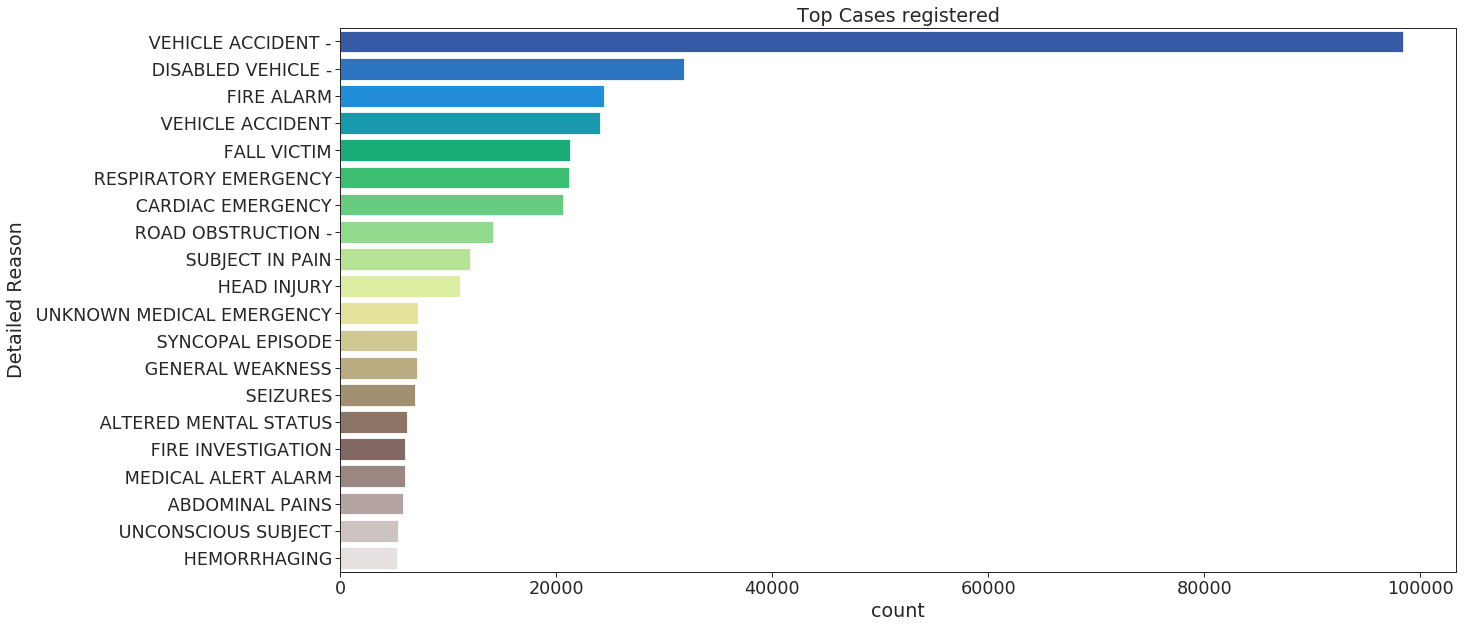

In [17]:
plt.figure(figsize=(20,10))
sns.set_context("paper", font_scale = 2)
sns.countplot(y='Detailed Reason', data=emer, palette="terrain", order=emer['Detailed Reason'].value_counts().index[:20])
plt.title("Top Cases registered")
sns.set_style("darkgrid")
plt.show()

### Top 10 Stations were incidents were reported

In [18]:
emer["Station"].value_counts().head(10)

Station 308A    15944
Station 329     14273
Station 313     13058
Station 381     10187
Station 317      9978
Station 345      9174
Station 308      8497
Station 351      7835
Station 345B     7658
Station 382      7055
Name: Station, dtype: int64

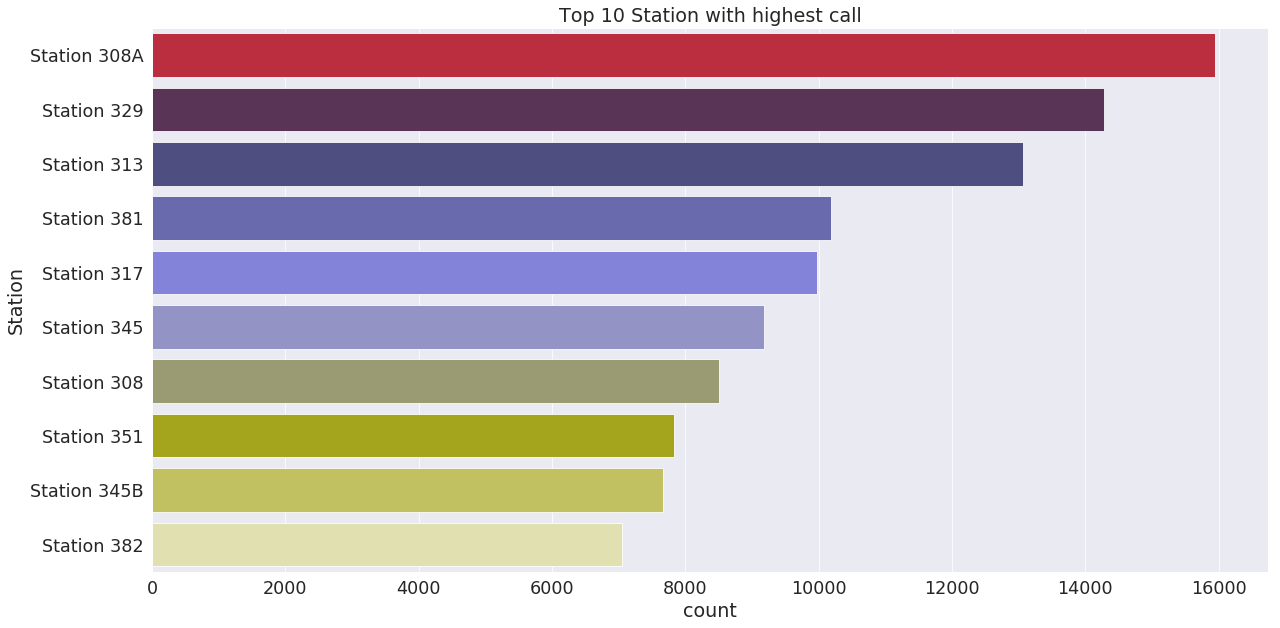

In [19]:
plt.figure(figsize=(20,10))
sns.set_context("paper", font_scale =2)
sns.countplot(y='Station',data=emer, palette = "gist_stern", order = emer["Station"].value_counts().index[:10])
plt.title("Top 10 Station with highest call")
sns.set_style("whitegrid")

### Finding out if the calls made more in day or night time

In [20]:
emer["Day/Night"].value_counts()

Day      346197
Night     77712
Name: Day/Night, dtype: int64

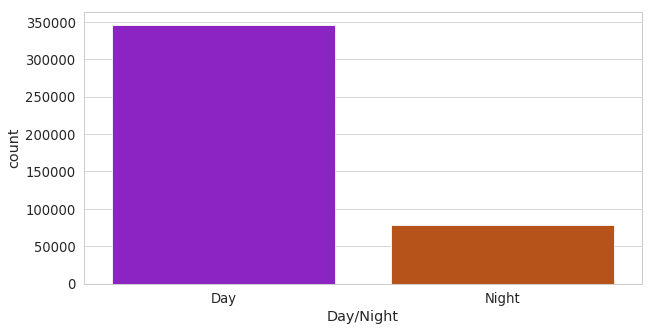

In [21]:
plt.figure(figsize=(10,5))
sns.set_context("paper", font_scale =1.5)
sns.countplot(x='Day/Night',data=emer,palette='gnuplot')
sns.set_style("darkgrid")

### Check on which day of the week calls were made more & does that have any significance

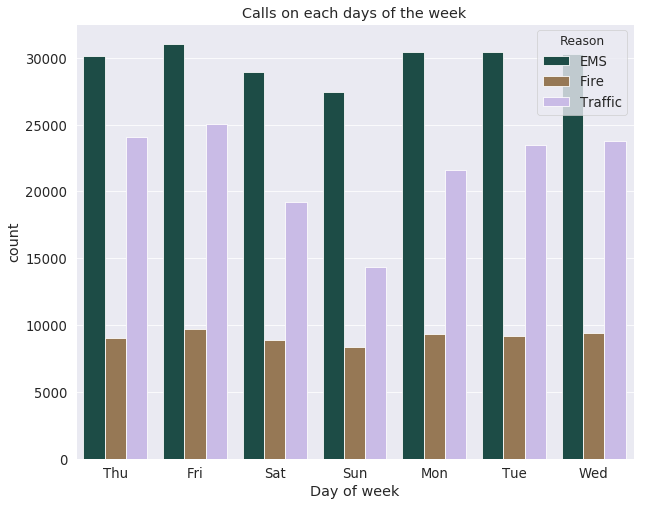

In [22]:
plt.figure(figsize=(10,8))
sns.countplot(x='Day of week',data=emer,hue='Reason',palette='cubehelix')
plt.title("Calls on each days of the week")
sns.set_style("ticks")